# Data Analysis and Predictive Modeling of Census Data

In [283]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [284]:
df = pd.read_csv("adult-modified.csv", sep=",")
df

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39,Public,13,Single,White,Male,40,<=50K
1,50,Self-emp,13,Married,White,Male,13,<=50K
2,38,Private,9,Single,White,Male,40,<=50K
3,53,Private,7,Married,Black,Male,40,<=50K
4,28,Private,13,Married,Black,Female,40,<=50K
5,37,Private,14,Married,White,Female,40,<=50K
6,49,Private,5,Married,Black,Female,16,<=50K
7,52,Self-emp,9,Married,White,Male,45,>50K
8,31,Private,14,Single,White,Female,50,>50K
9,42,Private,13,Married,White,Male,40,>50K


## a. Preprocessing and Data Analysis

In [285]:
ages = df[df['age']!='?']['age']
workclass_remove = df[df['workclass']=='?']
#None of the below atributes had missing values--Just age and workclass
education_remove = df[df['education'].isnull()]
marital_remove = df[df['marital-status'].isnull()]
race_remove = df[df['race']=='?']
sex_remove = df[df['sex']=='?']
hours_remove = df[df['hours-per-week'].isnull()]
income_remove = df[df['income'].isnull()]


#GET AVG AGE
avg_age = int(np.average(np.array(ages).astype(int)))
#RESET AGE TO AVG
df.loc[df['age']=='?', 'age'] = avg_age
df = df.drop(df.index[workclass_remove.index.values])
df['age'] = df['age'].apply(lambda x: int(x))


In [286]:
##Examine means, standard deviations, and other stats 
##associated with numerical attributes

df.describe()

,age,education,hours-per-week
count,9412.000000,9412.000000,9412.000000
mean,38.357310,10.125266,41.080217
std,12.962135,2.542118,11.884590
min,17.000000,1.000000,1.000000
25%,28.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
75%,47.000000,13.000000,45.000000
max,90.000000,16.000000,99.000000


In [287]:
df[df.income == 38]

,age,workclass,education,marital-status,race,sex,hours-per-week,income


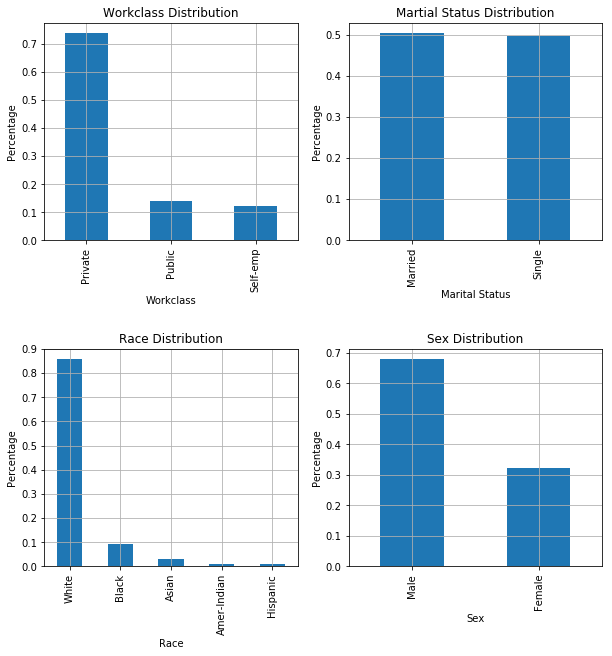

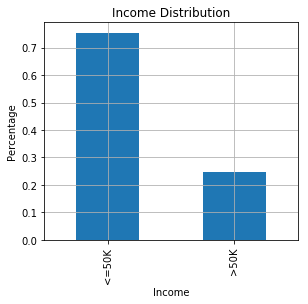

In [288]:
## show the distributions of 
## values associated with categorical attributes
def create_dist(column_name):
    return df[column_name].value_counts()/df[column_name].count()

workclass_dist = create_dist("workclass")
marital_dist = create_dist("marital-status")
race_dist = create_dist("race")
sex_dist = create_dist("sex")
income_dist = create_dist("income")



fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=.5)
ax1 = fig.add_subplot(221)
ax1.set_xlabel('Workclass')
ax1.set_ylabel('Percentage')
ax1.set_title("Workclass Distribution")
workclass_dist.plot(kind='bar', grid = True)

ax1 = fig.add_subplot(222)
ax1.set_xlabel('Marital Status')
ax1.set_ylabel('Percentage')
ax1.set_title("Martial Status Distribution")
marital_dist.plot(kind='bar', grid = True)


ax1 = fig.add_subplot(223)
ax1.set_xlabel('Race')
ax1.set_ylabel('Percentage')
ax1.set_title("Race Distribution")
race_dist.plot(kind='bar', grid = True)

ax1 = fig.add_subplot(224)
ax1.set_xlabel('Sex')
ax1.set_ylabel('Percentage')
ax1.set_title("Sex Distribution")
sex_dist.plot(kind='bar', grid = True)

fig2 = plt.figure(figsize=(10,10))
fig2.subplots_adjust(hspace=.5)

ax1 = fig2.add_subplot(221)
ax1.set_xlabel('Income')
ax1.set_ylabel('Percentage')
ax1.set_title("Income Distribution")
income_dist.plot(kind='bar', grid = True)




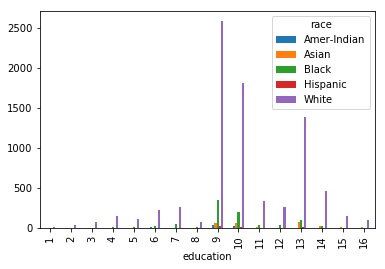

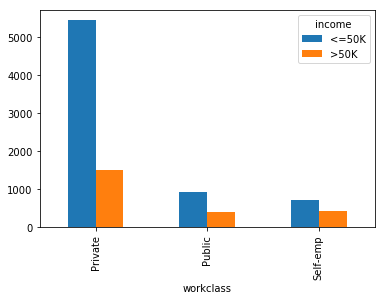

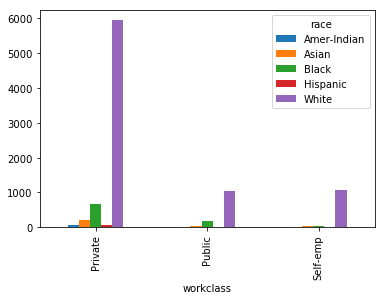

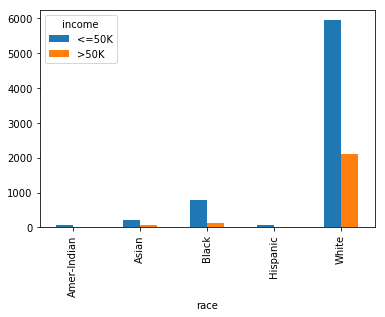

In [289]:
def generate_crosstab(first, second):
    cross_tab = pd.crosstab(df[first], df[second])
    plt.show(cross_tab.plot(kind="bar"))

generate_crosstab('education', 'race')
generate_crosstab('workclass', 'income')
generate_crosstab('workclass', 'race')
generate_crosstab('race', 'income')


In [290]:
df_lower_income = df[df[['race','income']]['income'] == "<=50K"]
df_lower_income[['race','income']]
df_lower_grouped = df_lower_income.groupby(['race', 'income']).agg({'race': 'count'})
print df_lower_grouped
df_lower_grouped.groupby(level=1).apply(lambda x:100 * x / float(x.sum()))



                    race
race        income      
Amer-Indian <=50K     83
Asian       <=50K    224
Black       <=50K    773
Hispanic    <=50K     69
White       <=50K   5944


,,race
race,income,
Amer-Indian,<=50K,1.170168
Asian,<=50K,3.158043
Black,<=50K,10.898069
Hispanic,<=50K,0.972790
White,<=50K,83.800930


In [291]:
df_race = df[['race']]
df_race.groupby(['race']).agg({'race': 'count'})

,race
race,
Amer-Indian,92
Asian,291
Black,892
Hispanic,75
White,8062


### This data shows that the largest percentage of low income households are white. However, I'm not sure this is very telling as the race distribution is heavily swayed for white people. Of course there will be more lower income whites as there are 5 times as many white people as total other races. 

# b.Predictive Modeling and Model Evaluation

In [383]:
df_pred = df
df_sex = pd.get_dummies(df['sex'])
df_workclass = pd.get_dummies(df['workclass'])
df_marital = pd.get_dummies(df['marital-status'])
df_race = pd.get_dummies(df['race'])
df_income = pd.get_dummies(df['income'])
df_new = df.join(df_sex).join(df_workclass).join(df_marital).join(df_race).join(df_income)
df_new_train = df_new[['Female', 'Private','Self-emp', 'Married','Amer-Indian','Asian', 'Black','Hispanic','White']]
df_target= df_new[['>50K']]
min_max_scaler = sk.preprocessing.MinMaxScaler()
vs_train_norm = np.array(df_new_train)
vs_target_norm = np.array(df_target)


In [435]:
# To model the Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction import DictVectorizer
from sklearn import model_selection
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from subprocess import check_call


In [426]:
def get_accuracy_ratio(predictions, vs_target):
    accuracy = [vs_target[i]== predictions[i] for i in range(len(vs_target))]
    return float(accuracy.count(True))/len(accuracy)

In [427]:
#Gaussian Naive Bayes
clf = GaussianNB()
#Simple K-Fold cross validation. 10 folds.
kf = model_selection.KFold(n_splits=10)
kf.get_n_splits(vs_train_norm)
model_selection.KFold(n_splits=10, random_state=None, shuffle=False)
results = []
for train_index, test_index in kf.split(vs_train_norm):
    clf.fit(vs_train_norm[train_index], vs_target_norm[train_index])
    target_pred = clf.predict(vs_train_norm[test_index])
    accuracy = np.mean(np.array(target_pred) == vs_target_norm)
    results.append(accuracy)

print "Overall Accuracy: " + str(np.mean(np.array(results)))

Overall Accuracy: 0.537777869618


In [437]:
#Decision Tree 
clf = tree.DecisionTreeClassifier(criterion="entropy")
#Simple K-Fold cross validation. 10 folds.
kf = model_selection.KFold(n_splits=10)
kf.get_n_splits(vs_train_norm)
model_selection.KFold(n_splits=10, random_state=None, shuffle=False)
results = []
index = 0
for train_index, test_index in kf.split(vs_train_norm):
    clf.fit(vs_train_norm[train_index], vs_target_norm[train_index])
    tree.export_graphviz(clf,out_file='tree'+ str(index) +'.dot')
    check_call(['dot','-Tpng','tree'+ str(index) +'.dot','-o','tree'+ str(index) +'.png'])
    target_pred = clf.predict(vs_train_norm[test_index])
    accuracy = np.mean(np.array(target_pred) == vs_target_norm)
    results.append(accuracy)
    index = index + 1

print "Overall Accuracy: " + str(np.mean(np.array(results)))

Overall Accuracy: 0.736207545594


In [430]:
#LDA 
clf = LinearDiscriminantAnalysis()
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,solver='svd', store_covariance=False, tol=0.0001)
#Simple K-Fold cross validation. 10 folds.
kf = model_selection.KFold(n_splits=10)
kf.get_n_splits(vs_train_norm)
model_selection.KFold(n_splits=10, random_state=None, shuffle=False)
results = []
for train_index, test_index in kf.split(vs_train_norm):
    clf.fit(vs_train_norm[train_index], vs_target_norm[train_index])
    target_pred = clf.predict(vs_train_norm[test_index])
    accuracy = np.mean(np.array(target_pred) == vs_target_norm)
    results.append(accuracy)

print "Overall Accuracy: " + str(np.mean(np.array(results)))

Overall Accuracy: 0.694598346766
